### Import necesaries libraries

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import random
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import array_to_img

import tensorflow as tf
import keras
from tensorflow.keras import models,layers 


### Visualize dataset 

In [2]:
def Visualize_dataset(path,class_name):
    
    plt.figure(figsize=(15,15))
    for i in range(1,21):
        plt.subplot(5,5,i)
        class_name = plt.imread(path + '/' + random.choice(os.listdir(path)))
        plt.imshow(class_name)
        plt.tight_layout()
        plt.xticks([])
        plt.yticks([])
    print(f" images shape is = {class_name.shape[0]} * {class_name.shape[1]} pixles")        

 images shape is = 150 * 150 pixles


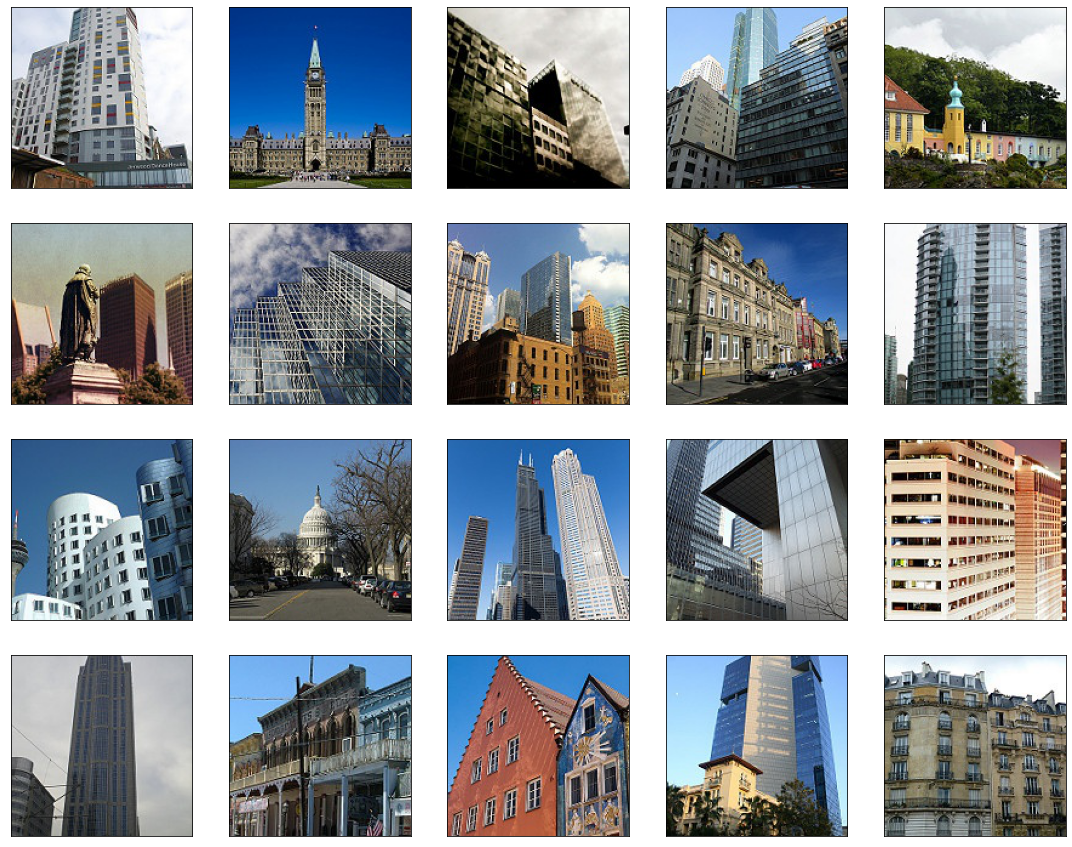

In [13]:
Visualize_dataset('Dataset/buildings','buildings_images')

 images shape is = 150 * 150 pixles


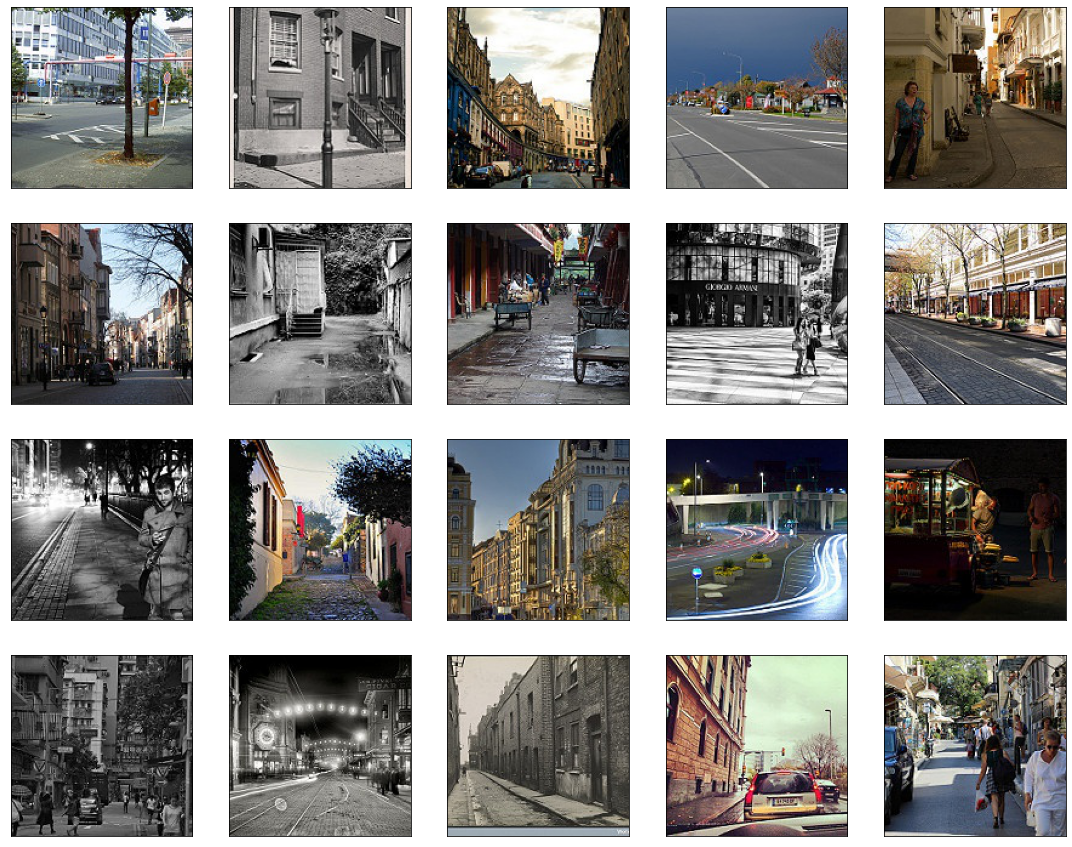

In [14]:
Visualize_dataset('Dataset/street','street_images')  

 images shape is = 150 * 150 pixles


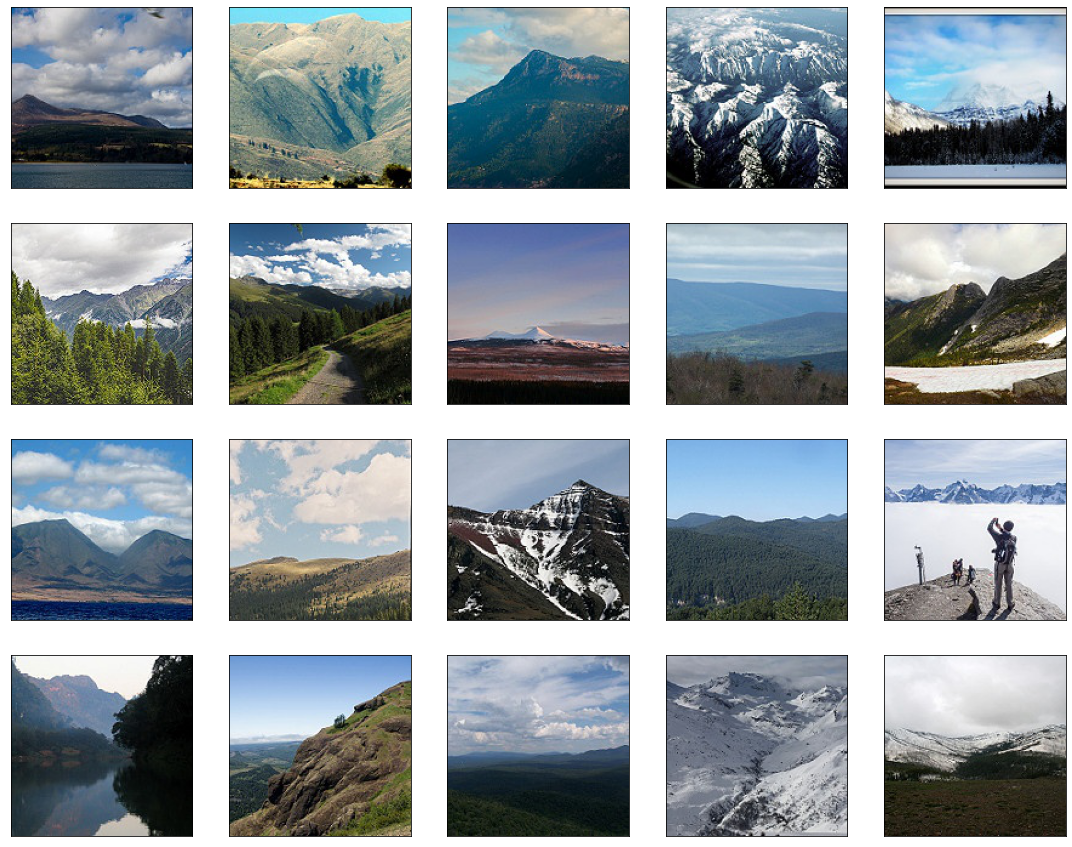

In [15]:
Visualize_dataset('Dataset/mountain','mountains_images')

 images shape is = 150 * 150 pixles


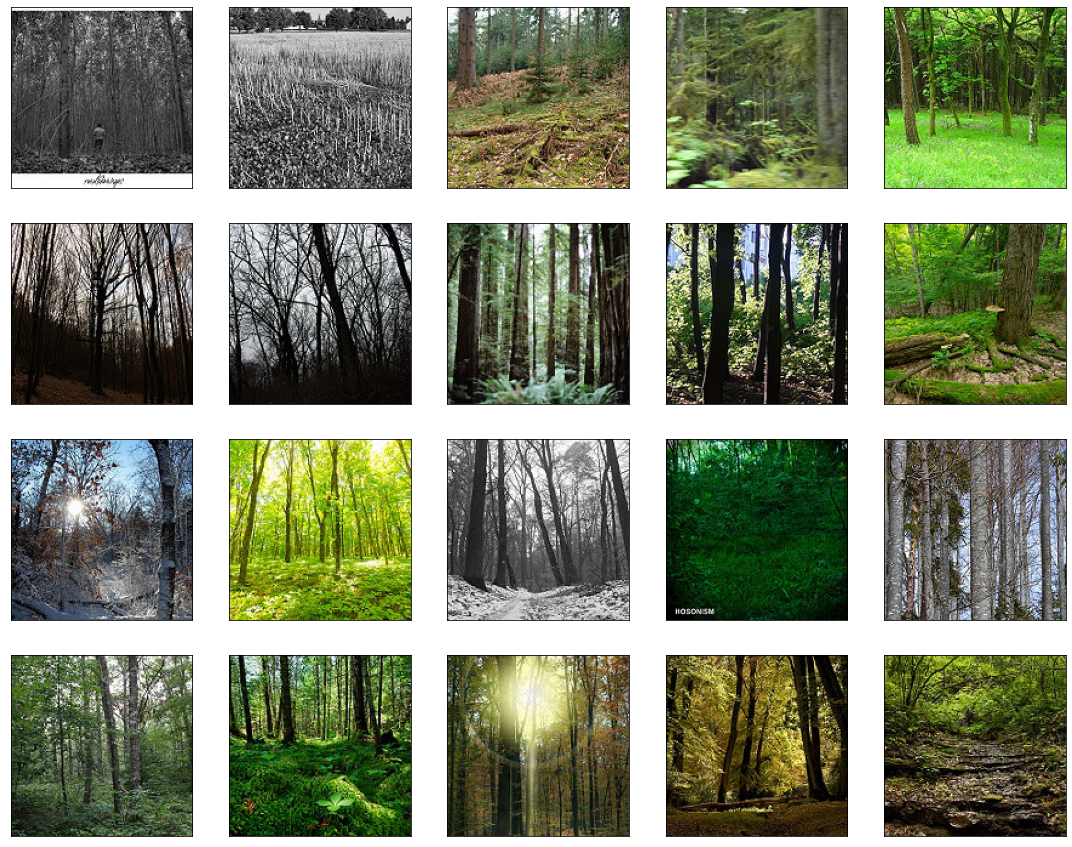

In [16]:
Visualize_dataset('Dataset/forest','forest_images')

## Data preprocessing

In [92]:
path = 'Dataset'
Dir = os.listdir(path)
image_list=[]
label_list=[]
for folder in Dir:
    for images in os.listdir(f"{path}/{folder}"):
        image_path = f"{path}/{folder}/{images}"
        each_image = cv.imread(image_path)
        each_image = cv.resize(each_image,(100,100)) #resize all images
        image_list.append(each_image)
        label_list.append(folder)

In [93]:
image_list[0]

array([[[245, 247, 247],
        [246, 248, 248],
        [246, 248, 248],
        ...,
        [248, 248, 248],
        [247, 248, 248],
        [245, 247, 247]],

       [[244, 246, 246],
        [245, 247, 247],
        [245, 248, 247],
        ...,
        [248, 248, 248],
        [247, 248, 248],
        [245, 247, 247]],

       [[244, 246, 246],
        [245, 247, 247],
        [245, 247, 247],
        ...,
        [249, 249, 249],
        [247, 248, 248],
        [245, 247, 247]],

       ...,

       [[ 52,  54,  55],
        [ 75,  77,  78],
        [ 67,  69,  70],
        ...,
        [ 69,  72,  77],
        [ 49,  52,  57],
        [ 35,  38,  43]],

       [[ 52,  54,  55],
        [ 47,  49,  50],
        [ 97,  99, 100],
        ...,
        [ 68,  71,  76],
        [ 37,  40,  45],
        [ 64,  67,  72]],

       [[ 58,  60,  61],
        [ 52,  54,  55],
        [ 84,  86,  87],
        ...,
        [ 33,  36,  41],
        [ 27,  30,  35],
        [ 48,  51,  56]]

In [94]:
label_list[0]

'buildings'

In [95]:
print(f"we have {len(image_list)}in our dataset")

we have 9356in our dataset


In [96]:
pd.value_counts(label_list)

mountain     2512
street       2382
forest       2271
buildings    2191
dtype: int64

In [97]:
image_list[0].shape

(100, 100, 3)

In [98]:
pd.value_counts(label_list).sum()

9356

### spliting data to train and test

In [99]:
x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.2,random_state=42)


In [100]:
len(x_train)

7484

In [101]:
len(x_test)

1872

### Normalization

In [102]:
# normalize data and convert it to numpy array
x_train = np.array(x_train,dtype=np.float16)/255.0 
x_test = np.array(x_test,dtype=np.float16)/255.0


In [103]:
x_train[0]

array([[[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       ...,

       [[0.3726, 0.341 , 0.3647],
        [0.4038, 0.3765, 0.396 ],
        [0.392 , 0.3687, 0.3726],
        ...,
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       [[0.3843, 0.353 , 0.3804],
        [0.408 , 0.3765, 0.4   ],
        [0.392 , 0.3687, 0.3765],
        .


### label binarizing

In [104]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [105]:
print(lb.classes_)

['buildings' 'forest' 'mountain' 'street']


In [126]:
y_test[0]

array([0, 0, 1, 0])

### spliting training data into train and validate 

In [106]:
x_train , x_val , y_train , y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [108]:
print(f'number of training data is {len(x_train)}')
print(f'number of testing data is {len(x_test)}')
print(f'number of validation data is {len(x_val)}')

number of training data is 5987
number of testing data is 1872
number of validation data is 1497


### Build cnn model

In [109]:

cnn_model = keras.Sequential([
    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    
    layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4,activation='softmax')
    
])
cnn_model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 conv2d_18 (Conv2D)          (None, 96, 96, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                 

### compile cnn_model

In [110]:
cnn_model.compile(optimizer=keras.optimizers.Adam(0.0005),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
epochs = 30
batch_size = 128

mc = keras.callbacks.ModelCheckpoint('best_model', monitor='val_loss', mode='min', patience = 10 ,save_best_only=True)

early_stopping = keras.callbacks.EarlyStopping( patience=10,
        min_delta=0,
        monitor='val_loss',
        verbose=1,
        mode='auto',) 
       

plateau = keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

history = cnn_model.fit(x_train,y_train, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    validation_data = (x_val, y_val),
                    callbacks=[early_stopping, plateau,mc])

Epoch 1/30
47/47 [==============================] - 99s 2s/step - loss: 1.1252 - accuracy: 0.4986 - val_loss: 0.8241 - val_accuracy: 0.6854 - lr: 5.0000e-04
Epoch 2/30
47/47 [==============================] - 115s 2s/step - loss: 0.7556 - accuracy: 0.6993 - val_loss: 0.6986 - val_accuracy: 0.7315 - lr: 5.0000e-04
Epoch 3/30
47/47 [==============================] - 128s 3s/step - loss: 0.6621 - accuracy: 0.7419 - val_loss: 0.5772 - val_accuracy: 0.7756 - lr: 5.0000e-04
Epoch 4/30
47/47 [==============================] - 136s 3s/step - loss: 0.6177 - accuracy: 0.7603 - val_loss: 0.5800 - val_accuracy: 0.7836 - lr: 5.0000e-04
Epoch 5/30
47/47 [==============================] - 130s 3s/step - loss: 0.5686 - accuracy: 0.7850 - val_loss: 0.5111 - val_accuracy: 0.8016 - lr: 5.0000e-04
Epoch 6/30
47/47 [==============================] - 133s 3s/step - loss: 0.5403 - accuracy: 0.7919 - val_loss: 0.4894 - val_accuracy: 0.8096 - lr: 5.0000e-04
Epoch 7/30
47/47 [==============================] - 1

In [112]:
cnn_model.evaluate(x_val,y_val)

47/47 [==============================] - 3s 72ms/step - loss: 0.3917 - accuracy: 0.8791


[0.39174503087997437, 0.8790915012359619]

In [111]:
cnn_model.evaluate(x_test,y_test)

59/59 [==============================] - 4s 74ms/step - loss: 0.3717 - accuracy: 0.8857


[0.3716600239276886, 0.8856837749481201]

In [64]:
model = keras.models.load_model('best_model/')

### cnn_model accuracy plot

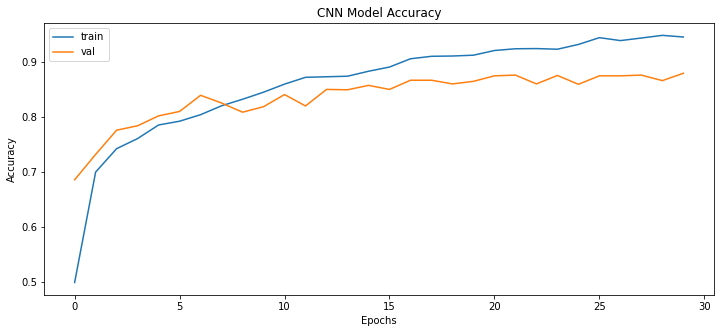

In [113]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

### cnn_model loss plot

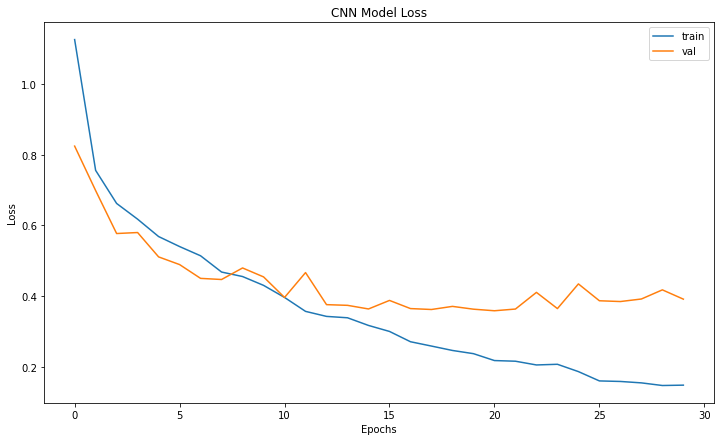

In [114]:
plt.figure(figsize=(12, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [115]:
y_predict = cnn_model.predict(x_test)
y_predict

59/59 [==============================] - 5s 63ms/step


array([[1.3679843e-03, 1.2092954e-03, 9.9731207e-01, 1.1069134e-04],
       [1.0292650e-11, 1.0000000e+00, 4.6042946e-14, 4.0256237e-10],
       [3.2019101e-02, 7.4887055e-04, 3.0937260e-11, 9.6723205e-01],
       ...,
       [1.6660584e-02, 8.0683101e-03, 8.8545895e-01, 8.9812130e-02],
       [2.2474939e-03, 9.1996361e-03, 9.8750931e-01, 1.0435932e-03],
       [1.8922947e-01, 4.8989814e-06, 8.1073737e-01, 2.8232775e-05]],
      dtype=float32)

In [116]:
y_predict.shape

(1872, 4)

In [127]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 42) 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [128]:
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [133]:
y_predicted_labels[0:5]

array([2, 1, 3, 3, 2], dtype=int64)

In [132]:
y_test[0:5]

['mountain', 'forest', 'street', 'street', 'mountain']

In [135]:
y_test = np.where(y_test == 'buildings', 0, y_test)

y_test = np.where(y_test == 'forest', 1, y_test)

y_test = np.where(y_test == 'mountain', 2, y_test)

y_test = np.where(y_test == 'street', 3, y_test)
y_test[0:5]

array(['2', '1', '3', '3', '2'], dtype='<U9')

In [137]:
y_test = y_test.astype('int32')
y_test[0:5]

array([2, 1, 3, 3, 2])

In [139]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[337,  17,  19,  68],
       [  1, 447,   9,  10],
       [ 12,   1, 484,   7],
       [ 38,  21,  11, 390]])>

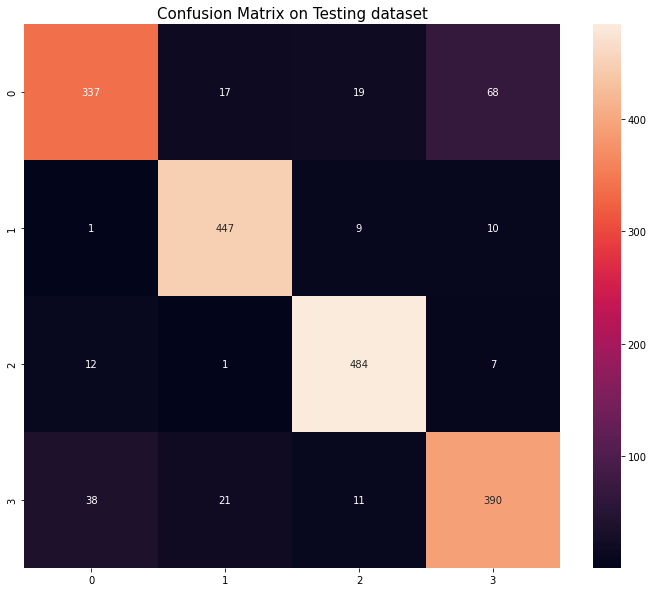

In [141]:
plt.figure(figsize=(12,10))
plt.title('Confusion Matrix on Testing dataset', {'fontsize' : '15'})
sns.heatmap(cm, annot=True, fmt='d');

In [144]:
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       441
           1       0.92      0.96      0.94       467
           2       0.93      0.96      0.94       504
           3       0.82      0.85      0.83       460

    accuracy                           0.89      1872
   macro avg       0.88      0.88      0.88      1872
weighted avg       0.88      0.89      0.88      1872



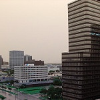

In [166]:
num = 1000
img = array_to_img(x_test[num])
img

In [167]:
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[num])])
print("Predicted : ",labels[np.argmax(y_predict[num])])

['buildings' 'forest' 'mountain' 'street']
Originally :  buildings
Predicted :  buildings
